## Hyperspy: Bruker spx files - single spectra and element analysis
[Energy-Dispersive X-ray Spectrometry (EDS) — HyperSpy 1.7.6 documentation](https://hyperspy.org/hyperspy-doc/v1.7/user_guide/eds.html)

### import needed libraries
- status of April 2024: Hyperspy version 2.x does not yet import the Bruker files because of errors during import. Use version 1.7.6 instead!

suggested install sequence using conda:
```
conda create -n hspy
activate hspy
conda install hyperspy=1.7.6 -c conda-forge
conda install jupyterlab
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
%matplotlib ipympl
import hyperspy.api as hs
%xmode Minimal
print('hyperspy version: ',hs.__version__)

Exception reporting mode: Minimal
hyperspy version:  1.7.6


### load a spx file
- hyperspy properly imports the metadata that is needed from the spx file!
- it also imports the element settings maed in the Esprit software
- usually no need to enter numbers!
- The metadata property is a Python dict but hyperspy provides a nice metadata viewer as well!

In [2]:
eds = hs.load('InP wafer.spx')
eds = hs.load('ingan.spx')
eds.metadata.Sample.elements # access to the metadata dict
eds.metadata.Acquisition_instrument.SEM.Detector.EDS.energy_resolution_MnKa = 126 # metadata does not have the measured value of 126eV
eds.metadata # full metadata viewer!

├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── detector_type = XFlash 7100
│       │       ├── elevation_angle = 35.0
│       │       ├── energy_resolution_MnKa = 126
│       │       ├── live_time = 10.783
│       │       └── real_time = 11.874
│       ├── Stage
│       │   └── tilt_alpha = 0.0
│       └── beam_energy = 20.0
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 1.7.6
│   │       ├── io_plugin = hyperspy.io_plugins.bruker
│   │       ├── operation = load
│   │       └── timestamp = 2024-04-07T09:40:55.463966+02:00
│   ├── date = 2024-04-02
│   ├── original_filename = ingan.spx
│   ├── time = 17:03:26
│   └── title = EDX
├── Sample
│   ├── elements = ['Ga', 'Au', 'In', 'N', 'Ti']
│   └── name = InGaN LED test structure 4
└── Signal
    ├── quantity = X-rays (Counts)
    └── signal_type = EDS_SEM

### edit the element list and add spectral markers

['Ga', 'In', 'N']
['C', 'Ga', 'In', 'N']


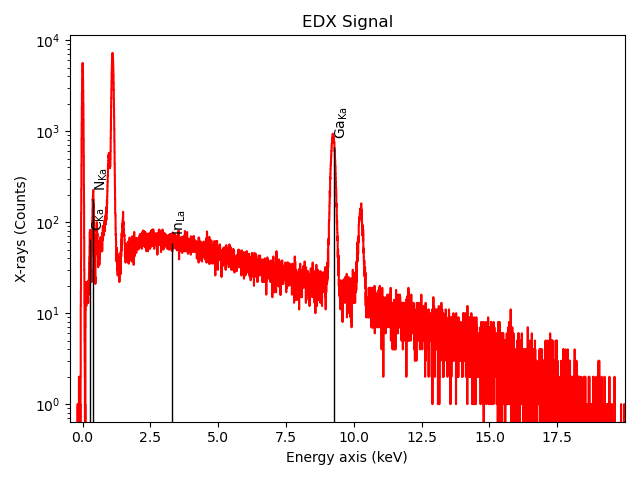

In [3]:
s = eds.deepcopy()
# if you want to replace the imported list with a new one:
s.set_elements(['Ga', 'In', 'N'])
print(s.metadata.Sample.elements)
s.add_elements(['C'])
print(s.metadata.Sample.elements)
s.add_lines()
s.metadata.Sample
s.plot(True,norm='log',)

### element property database (built into hyperspy)

In [4]:
hs.material.elements.Ga

├── Atomic_properties
│   ├── Binding_energies
│   │   ├── L1
│   │   │   ├── edge = Abrupt onset
│   │   │   ├── onset_energy (eV) = 1298.0
│   │   │   ├── relevance = Minor
│   │   │   └── threshold = 
│   │   ├── L2
│   │   │   ├── edge = Delayed maximum
│   │   │   ├── onset_energy (eV) = 1142.0
│   │   │   ├── relevance = Major
│   │   │   └── threshold = 
│   │   └── L3
│   │       ├── edge = Delayed maximum
│   │       ├── onset_energy (eV) = 1115.0
│   │       ├── relevance = Major
│   │       └── threshold = 
│   └── Xray_lines
│       ├── Ka
│       │   ├── energy (keV) = 9.2517
│       │   └── weight = 1.0
│       ├── Kb
│       │   ├── energy (keV) = 10.2642
│       │   └── weight = 0.1287
│       ├── La
│       │   ├── energy (keV) = 1.098
│       │   └── weight = 1.0
│       ├── Lb1
│       │   ├── energy (keV) = 1.1249
│       │   └── weight = 0.16704
│       ├── Lb3
│       │   ├── energy (keV) = 1.1948
│       │   └── weight = 0.0461
│       ├── Ll
│       │   ├── energy (keV) = 0.9573
│       │   └── weight = 0.0544
│       └── Ln
│           ├── energy (keV) = 0.9842
│           └── weight = 0.02509
├── General_properties
│   ├── Z = 31
│   ├── atomic_weight = 69.723
│   └── name = gallium
└── Physical_properties
    └── density (g/cm^3) = 5.904

### find energy of peaks in the spectrum
- 'slope_thresh' and 'amp_thresh', control sensitivity: higher values will neglect broad peaks (slope) and smaller features (amp), respectively.

In [5]:
peaks = eds.find_peaks1D_ohaver(amp_thresh=80,slope_thresh=0.1)[0]
# np array of tuples: 'position','width', and 'height' for each peak.
# peaks['position']
peaks

[########################################] | 100% Completed | 106.17 ms


C:\Users\schwa\miniconda3\envs\hspy\lib\site-packages\hyperspy\_signals\signal1d.py:132: UserWarning: kernel_size exceeds volume extent: the volume will be zero-padded.
  d = np.gradient(medfilt(y, medfilt_radius))


array([(1.56227434e-04, 42.74557476, 0.06685283),
       (2.73276339e-01,  6.68471911, 0.07326387),
       (3.88299362e-01, 10.23396462, 0.08121839),
       (7.17483148e-01,  6.92764184,        nan),
       (7.91784672e-01,  7.20627381,        nan),
       (8.04868709e-01,  7.18618761, 0.17248025),
       (8.65980648e-01,  7.7699223 , 0.23453833),
       (9.70448633e-01, 15.51870658, 0.15107318),
       (1.10434992e+00, 47.48790295, 0.1078247 ),
       (1.48875040e+00,  7.70924118, 0.13666916),
       (2.55578681e+00,  6.50737516, 0.15716426),
       (2.94951970e+00,  6.47421879, 0.21645105),
       (9.23320496e+00, 18.99237437, 0.19240413),
       (1.02560011e+01,  8.61034944, 0.1993459 )],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])

### find spectral lines close to an energy (use peaks from previous search)

In [6]:
posn = peaks['position']
for p in posn:    
    elems = hs.eds.get_xray_lines_near_energy(p, only_lines=['a', 'b'])
    print(f'{p}eV : {elems}')

0.00015622743354538296eV : ['H_Ka', 'He_Ka']
0.273276338933716eV : ['C_Ka', 'Ca_La', 'B_Ka']
0.38829936160326506eV : ['N_Ka', 'Sc_La', 'Ca_La', 'Ti_La']
0.7174831476800936eV : ['Fe_La', 'F_Ka', 'Co_La', 'Mn_La', 'Ce_Mb', 'La_Mb', 'La_Ma']
0.7917846722247499eV : ['Co_La', 'Ce_Mb', 'La_Mb', 'La_Ma', 'Ce_Ma', 'Ne_Ka', 'Ni_La', 'Ne_Kb', 'Ni_Lb1', 'Fe_La']
0.8048687088494226eV : ['Ce_Mb', 'La_Mb', 'La_Ma', 'Co_La', 'Ce_Ma', 'Ne_Ka', 'Ni_La', 'Ne_Kb', 'Ni_Lb1', 'Pr_Ma']
0.8659806482594317eV : ['Ne_Kb', 'Ni_Lb1', 'Ni_La', 'Ne_Ka', 'Ce_Ma', 'Pr_Ma', 'La_Ma', 'La_Mb', 'Ce_Mb', 'Cu_La', 'Nd_Ma', 'Pr_Mb', 'Cu_Lb1', 'Co_La']
0.9704486325778635eV : ['Pm_Ma', 'Cu_Lb1', 'Pr_Mb', 'Nd_Mb', 'Nd_Ma', 'Cu_La', 'Zn_La', 'Zn_Lb1', 'Na_Ka', 'Sm_Ma', 'Pr_Ma', 'Pm_Mb']
1.1043499171021378eV : ['Sm_Mb', 'Eu_Ma', 'Ga_La', 'Ga_Lb1', 'Na_Kb', 'Eu_Mb', 'Pm_Mb', 'Sm_Ma', 'Na_Ka', 'Zn_Lb1', 'Gd_Ma', 'Ge_La', 'Zn_La']
1.4887504004631842eV : ['Al_Ka', 'Br_La', 'Tm_Mb', 'Tm_Ma', 'Yb_Ma', 'Br_Lb1', 'Er_Mb', 'Se_Lb1', 'Al_

### a first fitting attempt!
- throw out elements not present for sure
- restrict energy range (isig)
- play with the background parameters

Al_Ka at 1.4865 keV : Intensity = 594.73
C_Ka at 0.2774 keV : Intensity = 375.35
Ga_Ka at 9.2517 keV : Intensity = 28325.04
Ga_La at 1.098 keV : Intensity = 89898.07
In_La at 3.287 keV : Intensity = 270.40
N_Ka at 0.3924 keV : Intensity = 1752.13
O_Ka at 0.5249 keV : Intensity = 445.64


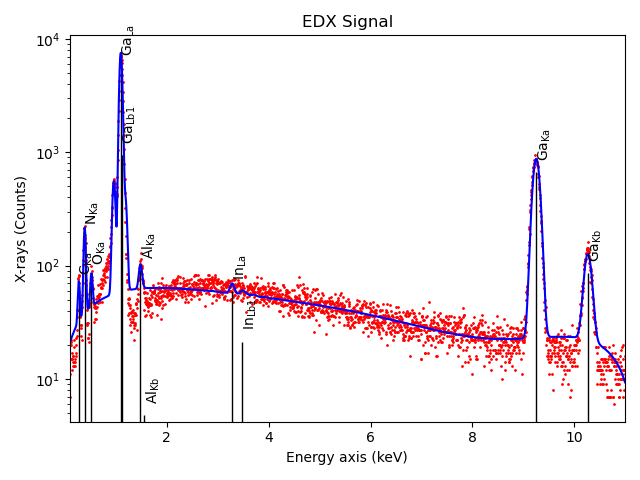

In [30]:
s = eds.deepcopy()
s.set_elements(['C','Ga', 'In', 'N','Al','O'])
s = s.isig[0.1:11.]
s.add_lines()
m = s.create_model()
m.fit_background(windows_sigma=[8, 8],)


#m.print_current_values()
m.fit()
#m.calibrate_energy_axis(calibrate='resolution')
m.get_lines_intensity(plot_result=True)
# what about the line at 0.97eV???
m.plot(norm='log',xray_lines='from_elements',only_one=False)
#m.plot(True,)

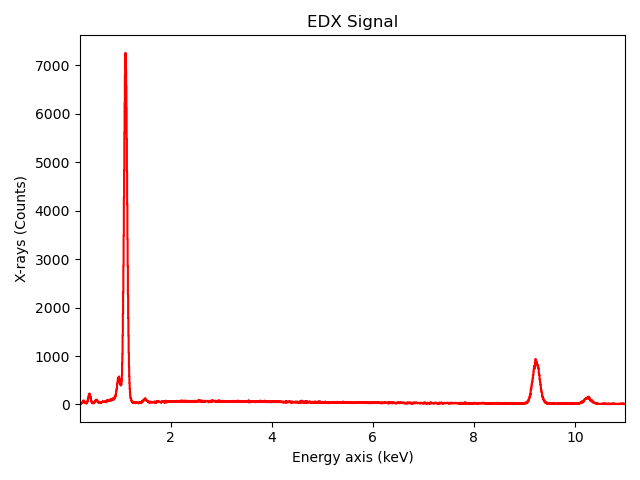

In [26]:
s = eds.deepcopy()
s.set_elements(['C','O','Ga', 'In', 'N','Mg'])
s = s.isig[0.2:11.]

bw = s.estimate_background_windows(line_width=[5.0, 2.0])
bw
#s.plot(background_windows=bw)
s.plot()

### get suggestions for a single energy

In [41]:
hs.eds.get_xray_lines_near_energy(1.19, only_lines=['a','b'],)

['Ge_La',
 'Gd_Ma',
 'Gd_Mb',
 'Ge_Lb1',
 'Eu_Mb',
 'Tb_Ma',
 'Mg_Ka',
 'Ga_Lb1',
 'Tb_Mb',
 'Sm_Mb',
 'Eu_Ma',
 'As_La',
 'Ga_La']